In [1]:
#reading necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io
import numpy as np
import altair as alt

## Coding Challenge 3

In [32]:
#read cc3_Avoidable mortality in England and Wales – children and young people.csv
db_mort_children = pd.read_csv('PortfolioData/cc3_Avoidable mortality in England and Wales – children and young people.csv')

#read cc3_Percentage of children, living in a family where no-one is disabled, in relative low income - AHC.csv
db_poverty_children = pd.read_csv('PortfolioData/cc3_Percentage of children, living in a family where no-one is disabled, in relative low income - AHC.csv')

In [ ]:
#head of the data
print(db_mort_children.head())

#turn both into numeric
db_mort_children['Ndeaths_Pregnancy_childbirth_perinatal'] = pd.to_numeric(db_mort_children['Ndeaths_Pregnancy_childbirth_perinatal'], errors='coerce')

In [33]:
#head of the data
print(db_poverty_children.head())

#turn both columns into numeric
db_poverty_children['pct_lowincome_children'] = pd.to_numeric(db_poverty_children['pct_lowincome_children'], errors='coerce')

   Year  pct_lowincome_children  numbermillions_lowincome_children
0  1994                      32                                4.1
1  1995                      33                                4.2
2  1996                      34                                4.3
3  1997                      33                                4.2
4  1998                      34                                4.3


#### Plotting graph 1

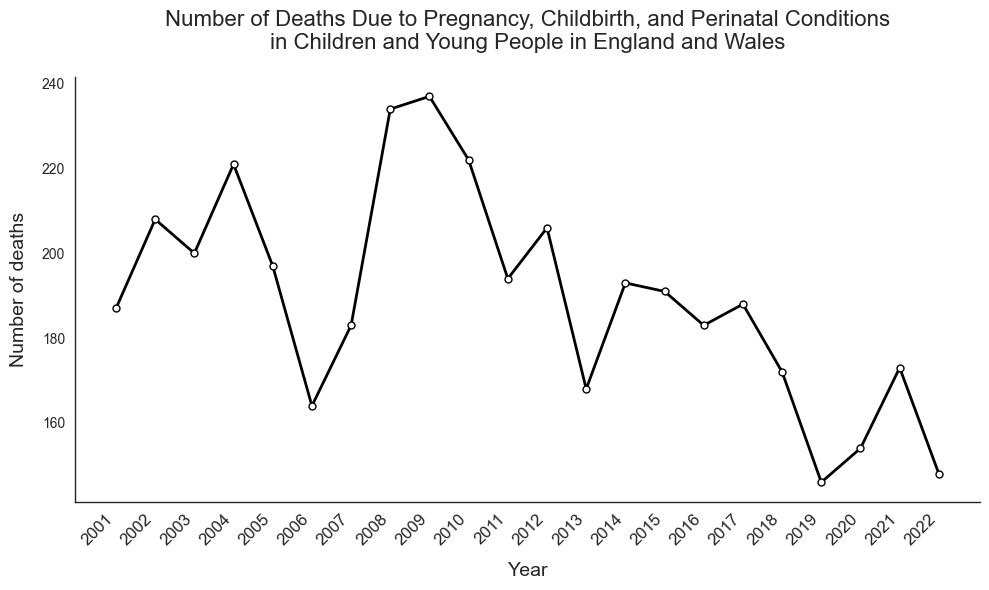

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("white")

fig, ax = plt.subplots(figsize=(10, 6))

# Plot: Year on the x-axis, deaths on the y-axis
ax.plot(db_mort_children['Year'], 
        db_mort_children['Ndeaths_Pregnancy_childbirth_perinatal'],
        color='darkred', linewidth=2, marker='o', markersize=5, 
        markerfacecolor='white', markeredgecolor='black')

# Labeling
ax.set_xlabel('Year', fontsize=14, labelpad=10)
ax.set_ylabel('Number of deaths', fontsize=14, labelpad=10)
ax.set_title('Number of Deaths Due to Pregnancy, Childbirth, and Perinatal Conditions\nin Children and Young People in England and Wales', 
             fontsize=16, pad=20)

# Ensure all years are shown on the x-axis
years = db_mort_children['Year']
ax.set_xticks(years)
ax.set_xticklabels(years, rotation=45, ha='right', fontsize=12)  # Rotate if needed for readability

# Remove top and right spines for a minimal look
sns.despine()

# No grid for a clean look
ax.grid(False)

plt.tight_layout()
plt.show()


#### Plotting graph II

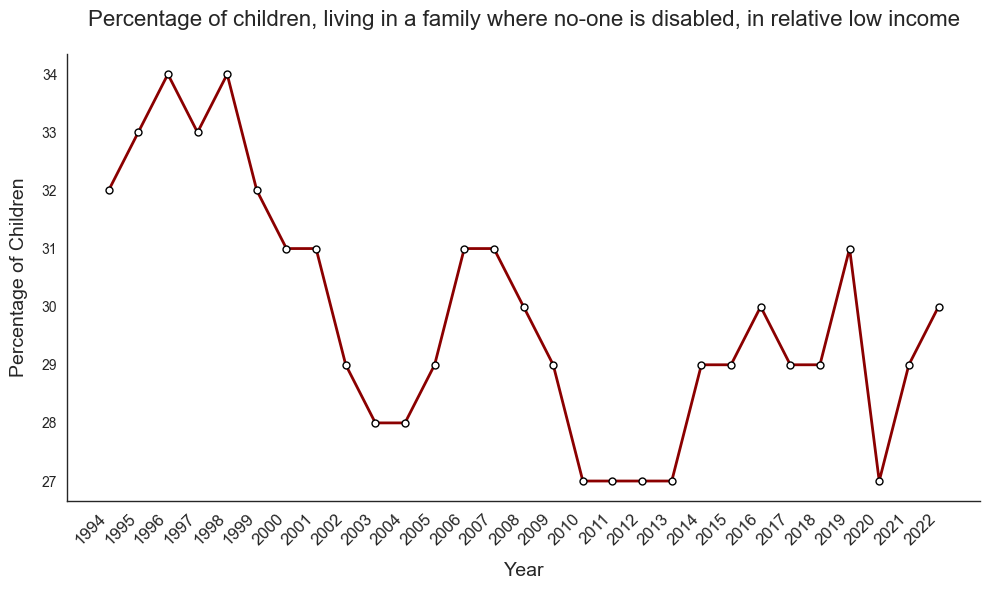

In [35]:
#plot timeseries using the same style as above

import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("white")

fig, ax = plt.subplots(figsize=(10, 6))

# Plot: Year on the x-axis, deaths on the y-axis
ax.plot(db_poverty_children['Year'], 
        db_poverty_children['pct_lowincome_children'],
        color='darkred', linewidth=2, marker='o', markersize=5, 
        markerfacecolor='white', markeredgecolor='black')

# Labeling
ax.set_xlabel('Year', fontsize=14, labelpad=10)
ax.set_ylabel('Percentage of Children', fontsize=14, labelpad=10)
ax.set_title('Percentage of children, living in a family where no-one is disabled, in relative low income', 
             fontsize=16, pad=20)

# Ensure all years are shown on the x-axis
years = db_poverty_children['Year']
ax.set_xticks(years)
ax.set_xticklabels(years, rotation=45, ha='right', fontsize=12)  # Rotate if needed for readability

# Remove top and right spines for a minimal look
sns.despine()

# No grid for a clean look
ax.grid(False)

plt.tight_layout()
plt.show()


## Coding Challenge 7

In [4]:
#reading prices data:

# URL of the CSV file
url = 'https://eco-prices-scrapes.s3.eu-west-2.amazonaws.com/teaching/davies_price_data/db_prices.csv'

# Fetch the CSV content
response = requests.get(url, verify=False)
response.raise_for_status()  # Ensure we notice bad responses

# Read the CSV content into a pandas DataFrame
prices_df = pd.read_csv(io.StringIO(response.text))

# Display a sample of the data
prices_df.sample(5)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'eco-prices-scrapes.s3.eu-west-2.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


,quote_date,shop_code,item_id_raw,region,price,indicator_box,item_id
12304931,199301.0,132.0,213003,3.0,1.29,NaN,213003
19205700,200201.0,148.0,310416,2.0,5.49,NaN,310416
7852891,199205.0,9.0,212510,6.0,0.56,NaN,212510
33812441,198908.0,43.0,510314,12.0,19.99,NaN,510314
27219960,200803.0,6.0,430515,5.0,1.99,NaN,430515


In [6]:
#reading itens data:

# URL of the CSV file
url = 'https://eco-prices-scrapes.s3.eu-west-2.amazonaws.com/teaching/davies_price_data/db_item_clean.csv'

# Fetch the CSV content
response = requests.get(url, verify=False)
response.raise_for_status()  # Ensure we notice bad responses

# Read the CSV content into a pandas DataFrame
items_df = pd.read_csv(io.StringIO(response.text))

# Display a sample of the data
items_df.sample(5)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'eco-prices-scrapes.s3.eu-west-2.amazonaws.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


,item_id,description,date_quote_s,date_quote_e,n_obs
1224,630137,"FLAT PANEL TV 14""-25""",200702,201101,8579
189,212011,COLA FLAVD DRINK 1.75-2 LT BTL,199402,201901,60121
1090,520214,LIPSTICK,198802,201001,36436
884,510230,WOMEN'S TROUSERS -2,199702,200101,13350
1276,630305,3 GOLF BALLS,198802,200301,25490


In [68]:
price_item_db = pd.merge(prices_df, items_df[['item_id', 'description']], on='item_id')

In [69]:
price_item_db['quote_date'] = pd.to_datetime(price_item_db['quote_date'], format='%Y%m') 

In [66]:
items_df[items_df.description.str.contains('butter', case=False)].sort_values(by=["date_quote_e", "date_quote_s"])

,item_id,description,date_quote_s,date_quote_e,n_obs
128,211302,BUTTER NEW ZEALAND,199601,199601,192
129,211303,BUTTER DANISH,199601,199601,185
127,211301,BUTTER-HOME PRODUCED-250G,198802,201301,47553
130,211304,BUTTER-IMPORTED 250G,199602,201301,28928
131,211305,SPREADABLE BUTTER,201302,202409,32303
132,211306,BUTTER 250G SPEC COO,201302,202409,32627
138,211409,"PEANUT BUTTER, JAR, 225-350G",201902,202409,15504


### Selecting a product and plotting 

In [56]:
#price_item_db[price_item_db.description.str.contains('OIL', case=False)]

#CHOSEN: 211408 | OLIVE OIL - 500ML - 1 LITRE
#CHOSEN: 211404 | COOKING OIL -VEGETABLE 1 LITRE

In [70]:
# Ensure quote_date is a datetime object
price_item_db['quote_date'] = pd.to_datetime(price_item_db['quote_date'])

# Define target item IDs
item_mapping = {
    211408: 'Olive Oil',    # OLIVE OIL - 500ML - 1 LITRE
    211306: 'Butter'   # COOKING OIL - VEGETABLE 1 LITRE
}

# Filter and process both items
oil_butter_db = (
    price_item_db[price_item_db['item_id'].isin(item_mapping.keys())]
    .assign(
        item_type=lambda df: df['item_id'].map(item_mapping),
        year_month=lambda df: df['quote_date'].dt.to_period('M')
    )
    .groupby(['item_type', 'year_month'])
    .agg({'price': 'median'})
    .reset_index()
    .assign(year_month=lambda df: df['year_month'].dt.to_timestamp())
)

In [71]:
#save csv
oil_butter_db.to_csv('oil_butter_db.csv', index=False)

## Coding challenge 9

In [20]:
#read cc9_health_cities_bra.csv
db_health_cities = pd.read_csv('PortfolioData/cc9_health_cities_bra.csv')

#columsn db_health_cities
print(db_health_cities.columns)

Index(['codmun', 'nomemun', 'n_med', 'tx_med', 'n_obitos_csap',
       'desp_tot_saude_pc_mun', 'pop', 'tx_mort_csap'],
      dtype='object')


In [21]:
columns_to_convert = ['n_med', 'tx_med', 'n_obitos_csap', 'desp_tot_saude_pc_mun', 'pop', 'tx_mort_csap']

# Replace commas with dots and convert to numeric
db_health_cities[columns_to_convert] = db_health_cities[columns_to_convert].apply(lambda x: pd.to_numeric(x.str.replace(',', '.'), errors='coerce'))

#is there na values?
db_health_cities.isna().sum()

codmun                   0
nomemun                  0
n_med                    0
tx_med                   0
n_obitos_csap            0
desp_tot_saude_pc_mun    4
pop                      0
tx_mort_csap             0
dtype: int64

In [22]:
# Sort dataset by population in descending order
db_health_cities = db_health_cities.sort_values(by='pop', ascending=False).reset_index(drop=True)

# Keep only the top 5000 rows
db_health_cities = db_health_cities.head(5000)

# Verify the change
print(db_health_cities.shape)  # Should print (5000, N) where N is the number of columns
print(db_health_cities.head())


(5000, 8)
   codmun         nomemun    n_med    tx_med  n_obitos_csap  \
0  355030       São Paulo  69126.0  6.036151        17928.0   
1  330455  Rio de Janeiro  31510.0  5.073075        15982.0   
2  530010        Brasília  13335.0  4.733119         3141.0   
3  230440       Fortaleza  10057.0  4.140885         3271.0   
4  292740        Salvador  12977.0  5.367547         4240.0   

   desp_tot_saude_pc_mun         pop  tx_mort_csap  
0                1639.41  11451999.0    156.549088  
1                1084.24   6211223.0    257.308424  
2                    NaN   2817381.0    111.486519  
3                1199.32   2428708.0    134.680661  
4                 859.81   2417678.0    175.374884  


### Scatter plot

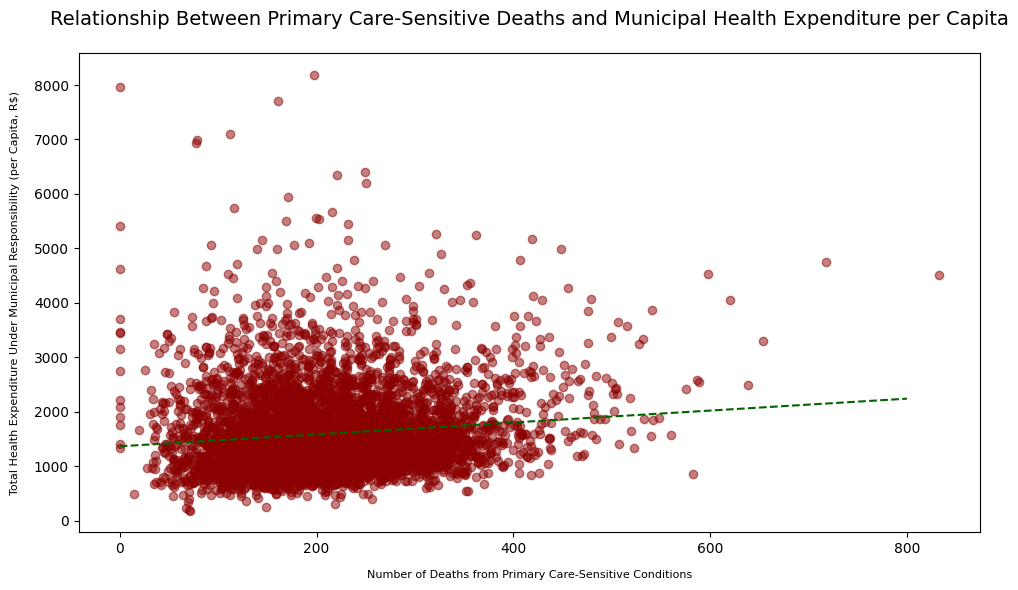

In [7]:
# Ensure there are no NaN values in the columns used for plotting
db_health_cities = db_health_cities.dropna(subset=['tx_mort_csap', 'desp_tot_saude_pc_mun'])

fig, ax = plt.subplots(figsize=(10, 6))

# Plot: n_obitos_csap on the x-axis, desp_tot_saude_pc_mun on the y-axis
ax.scatter(db_health_cities['tx_mort_csap'], 
           db_health_cities['desp_tot_saude_pc_mun'],
           color='darkred', alpha=0.5)

# Labeling
ax.set_xlabel('Number of Deaths from Primary Care-Sensitive Conditions', fontsize=8, labelpad=10)
ax.set_ylabel('Total Health Expenditure Under Municipal Responsibility (per Capita, R$)', fontsize=8, labelpad=10)
ax.set_title('Relationship Between Primary Care-Sensitive Deaths and Municipal Health Expenditure per Capita', fontsize=14, pad=20)

# Limit x axis to 1000
#ax.set_xlim(0, 1000)

# Fit a linear regression model
model = np.polyfit(db_health_cities['tx_mort_csap'], db_health_cities['desp_tot_saude_pc_mun'], 1)

# Generate the x values
x_values = np.linspace(0, 800, 100)

# Compute the y values
y_values = np.polyval(model, x_values)

# Plot the regression line
ax.plot(x_values, y_values, color='darkgreen', linestyle='--')

# No grid for a clean look
ax.grid(False)

plt.tight_layout()
plt.show()

## Coding challenge 10

In [ ]:
#read cc10_vaccines.csv
db_vaccines = pd.read_csv('PortfolioData/cc10_vaccines.csv')

#turn , into .  and numeric: 
columns_to_convert = ['cob_vac_bcg', 'cob_vac_rota', 'cob_vac_menin', 'cob_vac_pneumo',
       'cob_vac_polio', 'cob_vac_tvd1', 'cob_vac_penta', 'cob_vac_hepb','cob_vac_hepa']

# Replace commas with dots and convert to numeric
db_vaccines[columns_to_convert] = db_vaccines[columns_to_convert].apply(lambda x: pd.to_numeric(x.str.replace(',', '.'), errors='coerce'))

In [38]:
#print columns
print(db_vaccines.columns)

Index(['ano', 'cob_vac_bcg', 'cob_vac_rota', 'cob_vac_menin', 'cob_vac_pneumo',
       'cob_vac_polio', 'cob_vac_tvd1', 'cob_vac_penta', 'cob_vac_hepb',
       'cob_vac_hepa'],
      dtype='object')
